In [1]:
#1. 필요 라이브러리 설치
%pip install torchvision
%pip install torchinfo
%pip install pytorchcv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 49.5 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.4/532.4 kB 11.9 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
# 필요 라이브러리 설치(2)

import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision import datasets
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary
import numpy as np
import pytorchcv
import torch.optim as optim
from torch.utils.data import DataLoader, random_split

In [3]:
# 데이터 변환 정의
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 텐서로 변환
    transforms.Normalize((0.5,), (0.5,))  # 이미지를 -1에서 1 사이의 값으로 정규화
])

# 기본 FashionMNIST 데이터셋 로드
original_train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
original_test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# 데이터셋의 길이 확인
print("Original train dataset length:", len(original_train_dataset))
print("Original test dataset length:", len(original_test_dataset))

# 새로운 학습용 및 테스트용 데이터셋 생성
new_train_dataset = torch.utils.data.Subset(original_train_dataset, range(25000))
new_test_dataset = torch.utils.data.Subset(original_test_dataset, range(10000))

# 새로운 데이터셋의 길이 확인
print("New train dataset length:", len(new_train_dataset))
print("New test dataset length:", len(new_test_dataset))


100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Original train dataset length: 60000
Original test dataset length: 10000
New train dataset length: 25000
New test dataset length: 10000


Label: 9


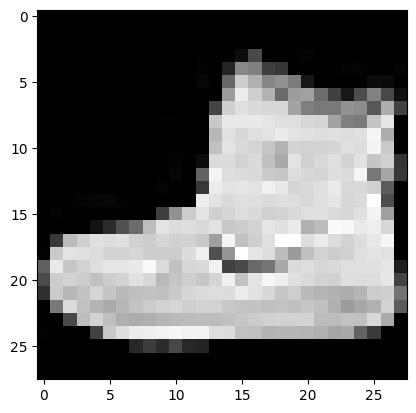

In [4]:
# 훈련 데이터의 첫 번째 이미지와 레이블 확인
image, label = new_train_dataset[0]
print("Label:", label)
plt.imshow(image.squeeze(), cmap='gray')
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# 데이터 추출
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# 이미지 시각화
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [5]:
# 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 64 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [6]:
# 모델 생성
model = CNN()

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 손실 값을 기록하는 리스트 정의
losses = []

# 훈련 데이터를 로드하는 DataLoader 정의
batch_size = 64  # 배치 크기 설정
trainloader = DataLoader(new_train_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(new_test_dataset, batch_size=batch_size, shuffle=True)



In [7]:
# 모델 훈련
for epoch in range(11):  # 에폭 수 설정: 초기 실험 결과 loss 손실 함수 값이 에폭이 11일 때, loss:0.148로 
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 200 == 199:  # 매 200 미니배치마다 출력
            print(f"[Epoch {epoch+1}, Batch {i+1}] loss: {running_loss / 200:.3f}")
            losses.append(running_loss / 200)
            running_loss = 0.0

print("Finished Training")

[Epoch 1, Batch 200] loss: 0.764
[Epoch 2, Batch 200] loss: 0.417
[Epoch 3, Batch 200] loss: 0.346
[Epoch 4, Batch 200] loss: 0.304
[Epoch 5, Batch 200] loss: 0.269
[Epoch 6, Batch 200] loss: 0.245
[Epoch 7, Batch 200] loss: 0.217
[Epoch 8, Batch 200] loss: 0.194
[Epoch 9, Batch 200] loss: 0.183
[Epoch 10, Batch 200] loss: 0.159
[Epoch 11, Batch 200] loss: 0.148
[Epoch 12, Batch 200] loss: 0.129
[Epoch 13, Batch 200] loss: 0.114
[Epoch 14, Batch 200] loss: 0.090
[Epoch 15, Batch 200] loss: 0.085
Finished Training


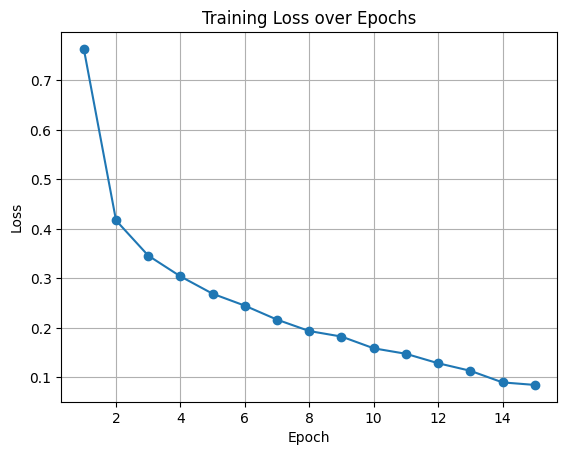

In [8]:
# 에폭별 손실값 시각화
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()

In [9]:
# 모델 테스트
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy of the network on the test images: {accuracy:.2f}%")

Accuracy of the network on the test images: 89.43%


In [10]:
# 잘못 분류된 이미지 확인
model.eval()
misclassified_images = []
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        misclassified_mask = predicted != labels
        misclassified_images.extend(inputs[misclassified_mask])
        predicted_labels.extend(predicted[misclassified_mask])
        true_labels.extend(labels[misclassified_mask])


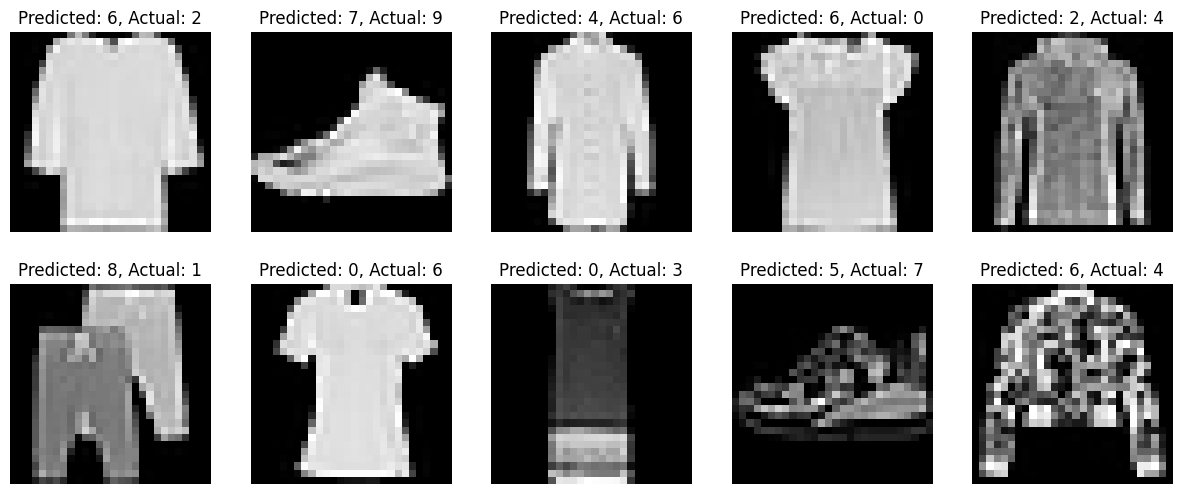

In [11]:
# 잘못 분류된 이미지 및 예측과 실제 레이블 시각화 (최대 10개 이미지)
num_images = len(misclassified_images)
num_display = min(num_images, 10)  # 최대 10개 이미지까지 표시

plt.figure(figsize=(15, 6))
for i in range(num_display):
    plt.subplot(2, 5, i + 1)
    plt.imshow(misclassified_images[i].squeeze(), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {true_labels[i]}")
    plt.axis('off')

plt.show()

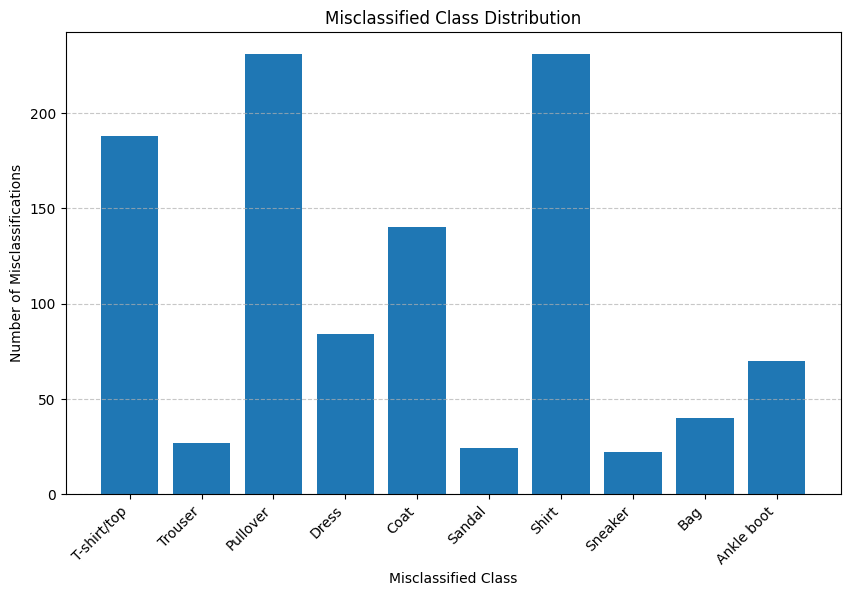

Total misclassified images: 1057 / 10000 (test data)


In [12]:
# 잘못 분류된 클래스별 분포 시각화
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
misclassified_class_count = {class_name: 0 for class_name in classes}

for true_label, predicted_label in zip(true_labels, predicted_labels):
    true_class = classes[true_label]
    predicted_class = classes[predicted_label]
    if true_class != predicted_class:
        misclassified_class_count[true_class] += 1

plt.figure(figsize=(10, 6))
plt.bar(misclassified_class_count.keys(), misclassified_class_count.values())
plt.xlabel('Misclassified Class')
plt.ylabel('Number of Misclassifications')
plt.title('Misclassified Class Distribution')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

total_misclassified = sum(misclassified_class_count.values())
total_test_images = len(new_test_dataset)
misclassification_ratio = total_misclassified / total_test_images

print(f"Total misclassified images: {total_misclassified} / {total_test_images} (test data)")
